# Taller 3 DExp - Punto 6 VA

## Ejercicio 9.15 Montgomery - Diseños $2^k$

+ ### En un estudio de rendimiento...

In [1]:
k <- 4
X <- matrix(0,2^k,k)
X[,1] <- rep(c(rep(-1,1),rep(1,1)),2^(k-1))
for(i in 1:(k-1)){
  X[,i+1] <- rep(c(rep(-1,2^i),rep(1,2^i)),  2^(k-1 - i))
}
colnames(X) <- LETTERS[1:k]
X <- as.data.frame(X)
print(X)

    A  B  C  D
1  -1 -1 -1 -1
2   1 -1 -1 -1
3  -1  1 -1 -1
4   1  1 -1 -1
5  -1 -1  1 -1
6   1 -1  1 -1
7  -1  1  1 -1
8   1  1  1 -1
9  -1 -1 -1  1
10  1 -1 -1  1
11 -1  1 -1  1
12  1  1 -1  1
13 -1 -1  1  1
14  1 -1  1  1
15 -1  1  1  1
16  1  1  1  1


In [2]:
y <- c(12,18,13,16,17,15,20,15,10,25,13,24,19,21,17,23)
#y <- c(15,13,17,19,12,10,15,13,18,17,25,23,16,20,24,21)
fit <- lm(y ~ 1 + A*B*C*D, data=X)
Xx <- model.matrix(fit)
colnames(Xx) <- gsub(":","",colnames(Xx))
print(Xx)

   (Intercept)  A  B  C  D AB AC BC AD BD CD ABC ABD ACD BCD ABCD
1            1 -1 -1 -1 -1  1  1  1  1  1  1  -1  -1  -1  -1    1
2            1  1 -1 -1 -1 -1 -1  1 -1  1  1   1   1   1  -1   -1
3            1 -1  1 -1 -1 -1  1 -1  1 -1  1   1   1  -1   1   -1
4            1  1  1 -1 -1  1 -1 -1 -1 -1  1  -1  -1   1   1    1
5            1 -1 -1  1 -1  1 -1 -1  1  1 -1   1  -1   1   1   -1
6            1  1 -1  1 -1 -1  1 -1 -1  1 -1  -1   1  -1   1    1
7            1 -1  1  1 -1 -1 -1  1  1 -1 -1  -1   1   1  -1    1
8            1  1  1  1 -1  1  1  1 -1 -1 -1   1  -1  -1  -1   -1
9            1 -1 -1 -1  1  1  1  1 -1 -1 -1  -1   1   1   1   -1
10           1  1 -1 -1  1 -1 -1  1  1 -1 -1   1  -1  -1   1    1
11           1 -1  1 -1  1 -1  1 -1 -1  1 -1   1  -1   1  -1    1
12           1  1  1 -1  1  1 -1 -1  1  1 -1  -1   1  -1  -1   -1
13           1 -1 -1  1  1  1 -1 -1 -1 -1  1   1   1  -1  -1    1
14           1  1 -1  1  1 -1  1 -1  1 -1  1  -1  -1   1  -1   -1
15        

In [3]:
ef_A = t(c(rep(c(-1,1),8)))%*%y
print(ef_A)

     [,1]
[1,]   36


In [4]:
options(warn=-1)
options(repr.plot.width=6, repr.plot.height=4)
efectos <- 2*fit$coef[2:16]
print(round(efectos,2))
print(anova(fit))

      A       B       C       D     A:B     A:C     B:C     A:D     B:D     C:D 
   4.50    0.50    2.00    3.25   -0.75   -4.25    0.25    4.00    0.00    0.00 
  A:B:C   A:B:D   A:C:D   B:C:D A:B:C:D 
   1.00    0.75   -0.25   -0.75    1.00 
Analysis of Variance Table

Response: y
          Df Sum Sq Mean Sq F value Pr(>F)
A          1  81.00   81.00               
B          1   1.00    1.00               
C          1  16.00   16.00               
D          1  42.25   42.25               
A:B        1   2.25    2.25               
A:C        1  72.25   72.25               
B:C        1   0.25    0.25               
A:D        1  64.00   64.00               
B:D        1   0.00    0.00               
C:D        1   0.00    0.00               
A:B:C      1   4.00    4.00               
A:B:D      1   2.25    2.25               
A:C:D      1   0.25    0.25               
B:C:D      1   2.25    2.25               
A:B:C:D    1   4.00    4.00               
Residuals  0   0.00         

integer(0)

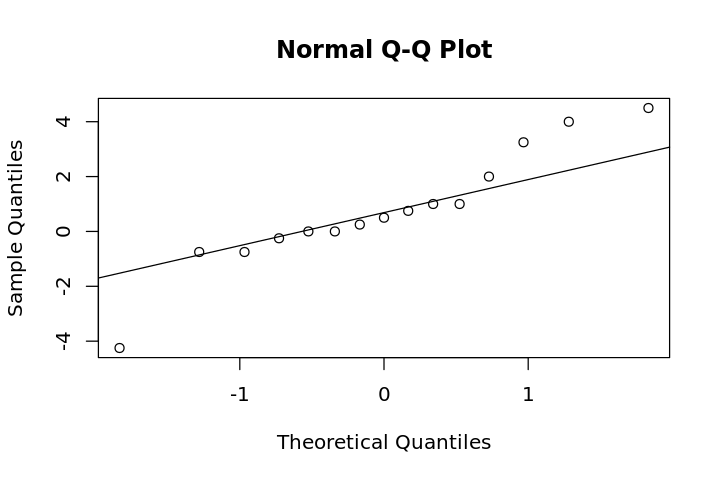

In [5]:
xx <- colnames(Xx)[2:16]
# grafico normal de probabilidades
grafico <- qqnorm(efectos)
qqline(efectos)
identify(grafico$x,grafico$y,n=5,labels=xx)

In [6]:
fit2 <- lm(y ~ A+C+D+A*C+A*D, data=X) # falta ACD y CD
# fit2 <- lm(y ~ A+C+D+A*C+A*D + C*D+A*C*D, data=X)
summary(fit2)
anova<-as.data.frame(anova(fit2))
print(anova)


Call:
lm(formula = y ~ A + C + D + A * C + A * D, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6250 -0.9375  0.1250  0.8750  1.3750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.3750     0.3187  54.520 1.04e-13 ***
A             2.2500     0.3187   7.060 3.46e-05 ***
C             1.0000     0.3187   3.138 0.010549 *  
D             1.6250     0.3187   5.099 0.000465 ***
A:C          -2.1250     0.3187  -6.668 5.58e-05 ***
A:D           2.0000     0.3187   6.276 9.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.275 on 10 degrees of freedom
Multiple R-squared:  0.9443,	Adjusted R-squared:  0.9165 
F-statistic: 33.91 on 5 and 10 DF,  p-value: 5.856e-06


          Df Sum Sq Mean Sq   F value       Pr(>F)
A          1  81.00  81.000 49.846154 3.456198e-05
C          1  16.00  16.000  9.846154 1.054853e-02
D          1  42.25  42.250 26.000000 4.646914e-04
A:C        1  72.25  72.250 44.461538 5.582907e-05
A:D        1  64.00  64.000 39.384615 9.193069e-05
Residuals 10  16.25   1.625        NA           NA


In [7]:
print(ef_A)
SC_A=(ef_A)^2/16
print(SC_A)

     [,1]
[1,]   36
     [,1]
[1,]   81


In [8]:
efectos[1]
print((efectos[1])^2/16)

A 
4.5

       A 
1.265625 


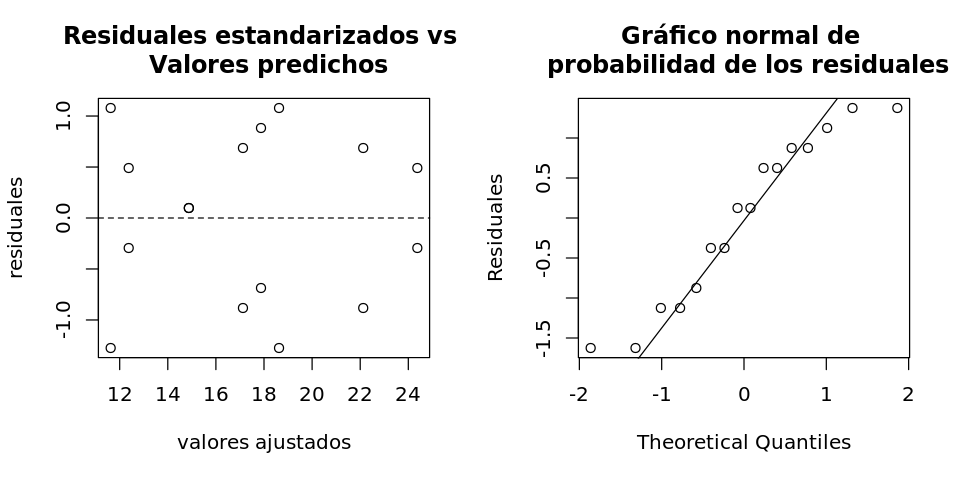

In [9]:
X.res <- resid(fit2)
respad <- X.res/sqrt(sum(X.res^2)/fit2$df.res)
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
plot(fitted(fit2), respad, xlab = "valores ajustados", ylab = "residuales",lty=4)
abline(h = 0, lty = 2)
title("Residuales estandarizados vs \n Valores predichos")
qqnorm(X.res, ylab = "Residuales", main = NULL)
qqline(X.res)
title("Gráfico normal de \n probabilidad de los residuales")